[Example from Geopandas documentation](http://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html)



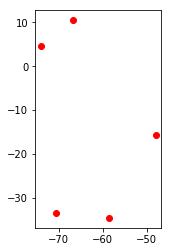

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

df['Coordinates']  = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)

gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

# not in the example - add mercato projection, set units to meters
gdf.crs = {'init': 'epsg:3395', 'units': 'm'}

gdf.plot(color='red')
plt.show()

Add a 10 meter buffer to the points.

In [7]:
buffed = []
for item in df['Coordinates']:
    buffed.append(item.buffer(10))

df['Coordinates'] = buffed

Expected: 10m polygons [espg: 3395 reference, units meters](https://epsg.io/3395)

Results: 10 degree polygons

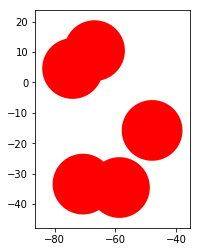

In [8]:
gdf.plot(color='red')
plt.show()